In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from scipy.stats import shapiro

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIS220/train.csv', header=None)

# Create a list of column names
column_names = ['Column_' + str(i) for i in range(1, 123)]

# Assign column names to the dataset
df.columns = column_names

In [ ]:
corr_matrix = df.corr()
target_column = 'Column_122'

# Get the correlation values for the target column
correlations = corr_matrix[target_column]

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print the columns with the highest correlation (excluding the target column itself)
highest_correlated_columns = sorted_correlations.drop(target_column).index

# Print the result
print("Highest correlated columns to column '{}':".format(target_column))
print(highest_correlated_columns)

<ipython-input-161-c8abeb808672>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Highest correlated columns to column 'Column_122':
Index(['Column_71', 'Column_10', 'Column_38', 'Column_86', 'Column_72',
       'Column_114', 'Column_105', 'Column_99', 'Column_65', 'Column_64',
       ...
       'Column_52', 'Column_54', 'Column_14', 'Column_40', 'Column_85',
       'Column_120', 'Column_2', 'Column_87', 'Column_26', 'Column_59'],
      dtype='object', length=105)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.shape

(246008, 53)

In [ ]:
df.head()


,Column_1,Column_2,Column_6,Column_7,Column_10,Column_13,Column_14,Column_15,Column_17,Column_21,Column_25,Column_26,Column_28,Column_30,Column_31,Column_32,Column_35,Column_40,Column_41,Column_42,Column_45,Column_46,Column_48,Column_53,Column_54,Column_56,Column_58,Column_59,Column_63,Column_64,Column_65,Column_68,Column_70,Column_71,Column_72,Column_73,Column_74,Column_81,Column_82,Column_84,Column_86,Column_90,Column_94,Column_99,Column_104,Column_105,Column_107,Column_109,Column_113,Column_114,Column_118,Column_121,Column_122
0,69769,-946,0,4,2,0.0,180000.0,0,6,0,0,0.289573,0.0,0,1,1,0.0,0.3333,13189.5,10,8,1.0,0,0,0.008230,0,90000.0,0.622922,0,-6378.0,1,1,0.0,-12298,0,0.0,2,0.9851,0,0.0,0.0,0.2197,6,0,0,1,0,0,1.0,-4670,1,0,0
1,236977,-92,1,30,3,0.0,135000.0,2,6,0,0,0.514261,2.0,0,1,1,0.0,0.1667,13095.0,13,4,0.0,1,0,0.003069,0,90000.0,0.546023,0,-1292.0,1,4,1.0,-15375,1,0.0,0,0.9821,0,0.0,-509.0,0.0691,5,0,0,1,0,0,1.0,-1994,1,0,0
2,168821,-1646,0,5,2,0.0,553500.0,0,5,1,0,0.486906,1.0,0,7,1,0.0,0.3750,26307.0,5,8,0.0,1,0,0.020713,0,135000.0,0.598926,0,-7951.0,1,4,1.0,-19307,0,0.0,0,0.9891,0,1.0,-1474.0,0.1269,5,0,0,1,0,0,2.0,-2842,3,0,1
3,94708,-1651,0,5,2,0.0,391500.0,0,6,1,0,0.675705,2.0,0,1,1,0.0,0.0417,34636.5,10,8,0.0,0,0,0.011703,0,135000.0,0.454321,0,-1033.0,1,4,1.0,-17791,0,0.0,0,0.9682,0,0.0,-2016.0,0.0065,5,0,0,1,0,0,4.0,-1345,3,0,1
4,84556,-977,0,35,2,0.0,225000.0,2,6,0,0,0.154565,0.0,0,1,1,0.0,0.1667,27558.0,5,0,0.0,1,0,0.006629,0,180000.0,0.546023,0,-2873.0,1,2,0.0,-8486,0,0.0,0,0.9821,0,0.0,-695.0,0.0691,1,0,0,1,0,0,1.0,-852,3,0,0


In [ ]:
threshold = 0.50
num_missing = df.isnull().sum()
pct_missing = num_missing / len(df)
to_drop = list(pct_missing[pct_missing > threshold].index)
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
# get data types of each column
dtypes = df.dtypes

# create 3 groups based on data types
continuous = []
binary = []
categorical = []
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("Column_122")
label.append("Column_122")

In [ ]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)
print("Label:", len(label), label)

Continuous variables: 28 ['Column_1', 'Column_2', 'Column_10', 'Column_13', 'Column_14', 'Column_26', 'Column_28', 'Column_35', 'Column_36', 'Column_38', 'Column_41', 'Column_42', 'Column_46', 'Column_54', 'Column_58', 'Column_59', 'Column_64', 'Column_67', 'Column_71', 'Column_73', 'Column_74', 'Column_84', 'Column_86', 'Column_91', 'Column_100', 'Column_113', 'Column_114', 'Column_119']
Binary variables: 32 ['Column_9', 'Column_16', 'Column_20', 'Column_21', 'Column_24', 'Column_25', 'Column_27', 'Column_29', 'Column_30', 'Column_34', 'Column_43', 'Column_47', 'Column_51', 'Column_53', 'Column_56', 'Column_63', 'Column_65', 'Column_66', 'Column_72', 'Column_76', 'Column_77', 'Column_82', 'Column_95', 'Column_98', 'Column_99', 'Column_101', 'Column_105', 'Column_106', 'Column_107', 'Column_109', 'Column_117', 'Column_121']
Categorical variables: 11 ['Column_6', 'Column_7', 'Column_17', 'Column_31', 'Column_32', 'Column_48', 'Column_68', 'Column_70', 'Column_94', 'Column_104', 'Column_

In [ ]:
# create a label encoder object
le = LabelEncoder()

# loop through each categorical variable and encode it
for col in categorical:
    df[col] = le.fit_transform(df[col])

# move any variables with only two possible values to the binary group
for col in categorical:
    if len(df[col].unique()) == 2:
        categorical.remove(col)
        binary.append(col)

In [ ]:
df['Column_34'].value_counts().sort_index()

0         1
1    246007
Name: Column_34, dtype: int64

In [ ]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)

Continuous variables: 28 ['Column_1', 'Column_2', 'Column_10', 'Column_13', 'Column_14', 'Column_26', 'Column_28', 'Column_35', 'Column_36', 'Column_38', 'Column_41', 'Column_42', 'Column_46', 'Column_54', 'Column_58', 'Column_59', 'Column_64', 'Column_67', 'Column_71', 'Column_73', 'Column_74', 'Column_84', 'Column_86', 'Column_91', 'Column_100', 'Column_113', 'Column_114', 'Column_119']
Binary variables: 16 ['Column_21', 'Column_25', 'Column_29', 'Column_30', 'Column_51', 'Column_53', 'Column_56', 'Column_63', 'Column_65', 'Column_72', 'Column_82', 'Column_99', 'Column_105', 'Column_107', 'Column_109', 'Column_121']
Categorical variables: 11 ['Column_6', 'Column_7', 'Column_17', 'Column_31', 'Column_32', 'Column_48', 'Column_68', 'Column_70', 'Column_94', 'Column_104', 'Column_118']


In [ ]:
# Fill missing values in numerical columns with median of their respective groups
df[continuous] = df.groupby("Column_122")[continuous].apply(lambda x: x.fillna(x.median()))

# Fill missing values in categorical columns with mode of their respective groups
df[binary] = df.groupby("Column_122")[binary].apply(lambda x: x.fillna(x.mode().iloc[0]))
df[categorical] = df.groupby("Column_122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))

<ipython-input-29-f262e2603e3c>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[continuous] = df.groupby("Column_122")[continuous].apply(lambda x: x.fillna(x.median()))
<ipython-input-29-f262e2603e3c>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[binary] = df.groupby("Column_122")[bina

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr().round(2)

# Filter the matrix to show only the values that meet the condition
corr_filtered = corr_matrix[(corr_matrix > 0.80) | (corr_matrix < -0.80)]

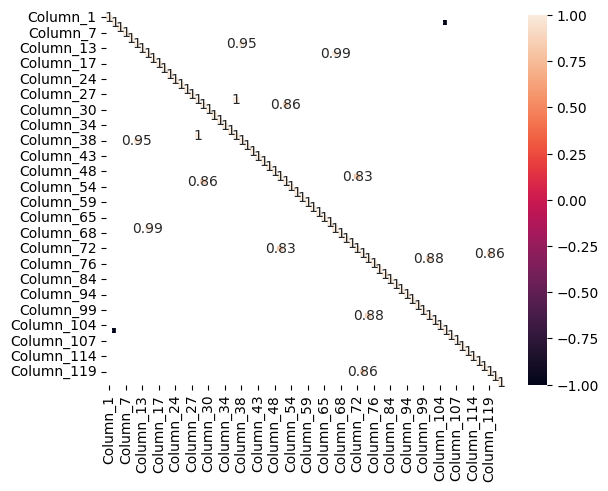

In [ ]:
# Plot the filtered correlation matrix using seaborn's heatmap
sns.heatmap(corr_filtered, annot=True)
plt.show()

In [ ]:
# Identify highly correlated feature pairs based on the threshold
high_corr_pairs = []
threshold = 0.8
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if corr_matrix.iloc[i,j] >= threshold:
            high_corr_pairs.append((df.columns[i], df.columns[j]))

In [ ]:
high_corr_pairs

[('Column_10', 'Column_38'),
 ('Column_14', 'Column_67'),
 ('Column_28', 'Column_36'),
 ('Column_29', 'Column_53'),
 ('Column_51', 'Column_72'),
 ('Column_73', 'Column_119'),
 ('Column_74', 'Column_100')]

In [ ]:
# Drop one feature from each highly correlated pair with priority given to continuous features
for pair in high_corr_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        if pair[0] in continuous:
            df = df.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            df = df.drop(pair[0], axis=1)
        else:
            vif_pair_0 = variance_inflation_factor(df.values, df.columns.get_loc(pair[0]))
            vif_pair_1 = variance_inflation_factor(df.values, df.columns.get_loc(pair[1]))
            if vif_pair_0 >= vif_pair_1:
                df = df.drop(pair[1], axis=1)
            else:
                df = df.drop(pair[0], axis=1)

In [ ]:
df.shape

(246008, 53)

In [ ]:
# Group the features based on the number of unique values
continuous_feats = []
categorical_feats = []
binary_feats = []
label = []

for col in df.columns:
    if df[col].nunique() == 2:
        binary_feats.append(col)
    elif df[col].nunique() > 30:
        continuous_feats.append(col)
    else:
        categorical_feats.append(col)

binary_feats.remove("Column_122")
label.append("Column_122")

In [ ]:
for col in continuous_feats:
    stat, p = shapiro(df[col])
    print(col, "Shapiro-Wilk test: Statistics=%.3f, p-value=%.3f" % (stat, p))
    if p > 0.05:
        print(col, "is normally distributed")
    else:
        print(col, "is not normally distributed")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column_1 Shapiro-Wilk test: Statistics=0.955, p-value=0.000
Column_1 is not normally distributed
Column_2 Shapiro-Wilk test: Statistics=0.480, p-value=0.000
Column_2 is not normally distributed
Column_7 Shapiro-Wilk test: Statistics=0.856, p-value=0.000
Column_7 is not normally distributed
Column_14 Shapiro-Wilk test: Statistics=0.889, p-value=0.000
Column_14 is not normally distributed
Column_26 Shapiro-Wilk test: Statistics=0.927, p-value=0.000
Column_26 is not normally distributed
Column_28 Shapiro-Wilk test: Statistics=0.612, p-value=0.000
Column_28 is not normally distributed
Column_41 Shapiro-Wilk test: Statistics=0.911, p-value=0.000
Column_41 is not normally distributed
Column_54 Shapiro-Wilk test: Statistics=0.877, p-value=0.000
Column_54 is not normally distributed
Column_58 Shapiro-Wilk test: Statistics=0.116, p-value=0.000
Column_58 is not normally distributed
Column_59 Shapiro-Wilk test: Statistics=0.967, p-value=0.000
Column_59 is not normally distributed
Column_64 Shapir

In [ ]:
num_rows = df.shape[0]
identical_threshold = 0.995  # 99.5% threshold
columns_to_delete = []

for column in df.columns:
    value_counts = df[column].value_counts()
    most_common_count = value_counts.iloc[0]
    percentage_identical = most_common_count / num_rows

    if percentage_identical > identical_threshold:
        columns_to_delete.append(column)

# Delete the identified columns
df = df.drop(columns=columns_to_delete)


In [ ]:
df.head()

,Column_1,Column_2,Column_6,Column_7,Column_10,Column_13,Column_14,Column_15,Column_17,Column_21,Column_25,Column_26,Column_28,Column_30,Column_31,Column_32,Column_35,Column_40,Column_41,Column_42,Column_45,Column_46,Column_48,Column_53,Column_54,Column_56,Column_58,Column_59,Column_63,Column_64,Column_65,Column_68,Column_70,Column_71,Column_72,Column_73,Column_74,Column_81,Column_82,Column_84,Column_86,Column_90,Column_94,Column_99,Column_104,Column_105,Column_107,Column_109,Column_113,Column_114,Column_118,Column_121,Column_122
0,69769,-946,0,4,2,0.0,180000.0,0,6,0,0,0.289573,0.0,0,1,1,0.0,0.3333,13189.5,10,8,1.0,0,0,0.008230,0,90000.0,0.622922,0,-6378.0,1,1,0.0,-12298,0,0.0,2,0.9851,0,0.0,0.0,0.2197,6,0,0,1,0,0,1.0,-4670,1,0,0
1,236977,-92,1,30,3,0.0,135000.0,2,6,0,0,0.514261,2.0,0,1,1,0.0,0.1667,13095.0,13,4,0.0,1,0,0.003069,0,90000.0,0.546023,0,-1292.0,1,4,1.0,-15375,1,0.0,0,0.9821,0,0.0,-509.0,0.0691,5,0,0,1,0,0,1.0,-1994,1,0,0
2,168821,-1646,0,5,2,0.0,553500.0,0,5,1,0,0.486906,1.0,0,7,1,0.0,0.3750,26307.0,5,8,0.0,1,0,0.020713,0,135000.0,0.598926,0,-7951.0,1,4,1.0,-19307,0,0.0,0,0.9891,0,1.0,-1474.0,0.1269,5,0,0,1,0,0,2.0,-2842,3,0,1
3,94708,-1651,0,5,2,0.0,391500.0,0,6,1,0,0.675705,2.0,0,1,1,0.0,0.0417,34636.5,10,8,0.0,0,0,0.011703,0,135000.0,0.454321,0,-1033.0,1,4,1.0,-17791,0,0.0,0,0.9682,0,0.0,-2016.0,0.0065,5,0,0,1,0,0,4.0,-1345,3,0,1
4,84556,-977,0,35,2,0.0,225000.0,2,6,0,0,0.154565,0.0,0,1,1,0.0,0.1667,27558.0,5,0,0.0,1,0,0.006629,0,180000.0,0.546023,0,-2873.0,1,2,0.0,-8486,0,0.0,0,0.9821,0,0.0,-695.0,0.0691,1,0,0,1,0,0,1.0,-852,3,0,0


In [ ]:
df = df.drop(['Column_91'], axis=1)

In [ ]:
column_to_modify = ['Column_35', 'Column_70', 'Column_84']

# Convert values greater than 1 to 1
df[column_to_modify] = np.where(df[column_to_modify] > 1, 1, df[column_to_modify])

In [ ]:
for col in categorical_feats:
    if len(df[col].unique()) == 2:
        categorical.remove(col)
        binary.append(col)

In [ ]:
df['Column_35'].unique()

array([0., 1.])

In [ ]:
df.shape

(246008, 70)

In [ ]:
df['Column_84'].value_counts().sort_index()

0.0    239212
1.0      6796
Name: Column_84, dtype: int64

In [ ]:
df.shape

(246008, 45)

In [ ]:
df.to_csv('/content/drive/MyDrive/MIS220/preprocessed_data123.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop('Column_122', axis=1)
y = df['Column_122']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9193931565255095


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIS220/preprocessed_data.csv')

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/MIS220/pretest.csv')

In [ ]:
dt = dt.drop('Column_122', axis = 1)

In [ ]:
variable_counts = np.bincount(y_pred)

# Print the variable counts
for variable, count in enumerate(variable_counts):
    print(f"Variable {variable}: {count} occurrences")

Variable 0: 24601 occurrences


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(dt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/MIS220/pretest22_data.csv')

# Preprocess the test data (if needed)
# Ensure that the test data has the same preprocessing steps as the training data

# Extract the features from the test data
test_features = test_data.iloc[:, :-1]  # All columns except the last one

# Use the trained model to predict the outcomes for the test data
predicted_outcomes = model.predict(test_features)

# Create a new DataFrame with the test data and predicted outcomes
results = pd.DataFrame({'Column_122': test_data['Column_122'], 'Predicted_Outcome': predicted_outcomes})

# Save the results to a new file
results.to_csv('/content/drive/MyDrive/MIS220/pred33.csv', index=False)  # Adjust the filename as desired

In [ ]:
variable_counts = np.bincount(y_pred)

# Print the variable counts
for variable, count in enumerate(variable_counts):
    print(f"Variable {variable}: {count} occurrences")

Variable 0: 46765 occurrences
Variable 1: 2437 occurrences


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed train dataset


# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.95, random_state=40)

# Create a logistic regression model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9646524723158814


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score



# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.951111, random_state=40)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.968907731824379


In [ ]:
dt.head()

,Column_2,Column_6,Column_7,Column_10,Column_13,Column_14,Column_17,Column_21,Column_25,Column_26,...,Column_99,Column_104,Column_105,Column_107,Column_109,Column_113,Column_114,Column_118,Column_121,Column_122
0,-4930,0,11,2,1.0,315000.0,1,0,0,0.619621,...,0,0,1,0,0,6.0,-1259,1,0,1
1,-1191,0,18,2,0.0,225000.0,6,1,0,0.030108,...,0,0,1,0,0,3.0,-2474,0,0,2
2,-355,0,39,3,0.0,873000.0,6,0,1,0.417593,...,1,0,1,0,0,1.0,-2289,3,0,3
3,-1366,0,11,2,0.0,279000.0,6,0,0,0.355126,...,0,0,1,0,0,1.0,-1040,0,0,4
4,-451,0,5,2,1.0,252000.0,6,0,0,0.489540,...,0,0,1,0,0,0.0,-2261,1,0,5


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
dtt = pd.read_csv('/content/drive/MyDrive/MIS220/pred33.csv')

In [ ]:
dtt['Predicted_Outcome'].value_counts().sort_index()

0    37335
1    24167
Name: Predicted_Outcome, dtype: int64

In [ ]:
dtt.head()

,Column_122,Predicted_Outcome
0,1,1
1,2,0
2,3,0
3,4,1
4,5,0


In [ ]:
dtt.rename(columns={'Column_122': 'kaggle_id'}, inplace=True)

In [ ]:
dtt.rename(columns={'Predicted_Outcome': 'target'}, inplace=True)

In [ ]:
dtt.to_csv('/content/drive/MyDrive/MIS220/predict12.csv', index=False)


In [ ]:
dcf = pd.read_csv('/content/drive/MyDrive/MIS220/predict6.csv')

In [ ]:
dcf['target'].value_counts().sort_index()

0    45197
1    16305
Name: target, dtype: int64